In [29]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:\Users\zhida\Desktop\kaggle.data\credit_card_transactions.csv')

df[['trans_date','trans_time']]=df['trans_date_trans_time'].str.split(' ',expand=True)
df['trans_date']=pd.to_datetime(df['trans_date'])
df['trans_time']=pd.to_datetime(df['trans_time'])
df['dob']=pd.to_datetime((df['dob']))
df['birth_year']=df['dob'].dt.year
df['year']= df['trans_date'].dt.year
df['month']=df['trans_date'].dt.month
df['hour']=df['trans_time'].dt.hour
df['age']=df['year'] - df['birth_year']
print(df.isna().sum())   

C:\Users\zhida\AppData\Local\Temp\ipykernel_10360\397233973.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_time']=pd.to_datetime(df['trans_time'])


Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
trans_date                    0
trans_time                    0
birth_year                    0
year                          0
month                         0
hour                          0
age                           0
dtype: i

In [30]:
df1=df.copy()
df1=df1.drop('Unnamed: 0',axis=1)
df1=df1.drop('trans_date_trans_time', axis=1).reset_index()
df1['merch_zipcode']=df1['merch_zipcode'].fillna(method='ffill')
print(df1.isna().sum())

C:\Users\zhida\AppData\Local\Temp\ipykernel_10360\1206744752.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['merch_zipcode']=df1['merch_zipcode'].fillna(method='ffill')


index            0
cc_num           0
merchant         0
category         0
amt              0
first            0
last             0
gender           0
street           0
city             0
state            0
zip              0
lat              0
long             0
city_pop         0
job              0
dob              0
trans_num        0
unix_time        0
merch_lat        0
merch_long       0
is_fraud         0
merch_zipcode    0
trans_date       0
trans_time       0
birth_year       0
year             0
month            0
hour             0
age              0
dtype: int64


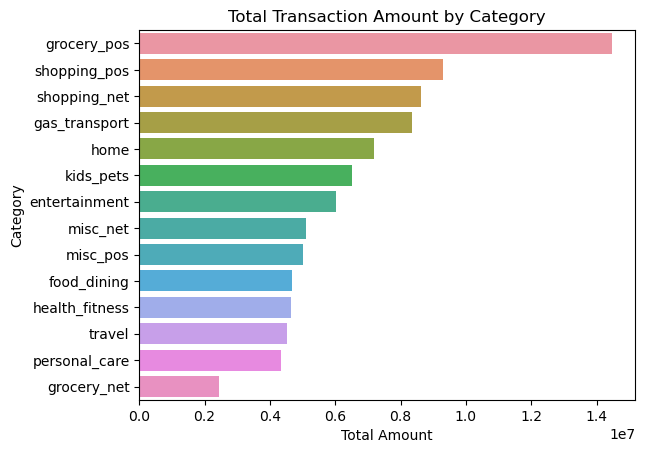

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
df2=df1.groupby('category')['amt'].sum().reset_index().sort_values('amt',ascending=False)
sns.barplot(x='amt',y='category',data=df2)
plt.title('Total Transaction Amount by Category')
plt.xlabel('Total Amount')
plt.ylabel('Category')
plt.show()

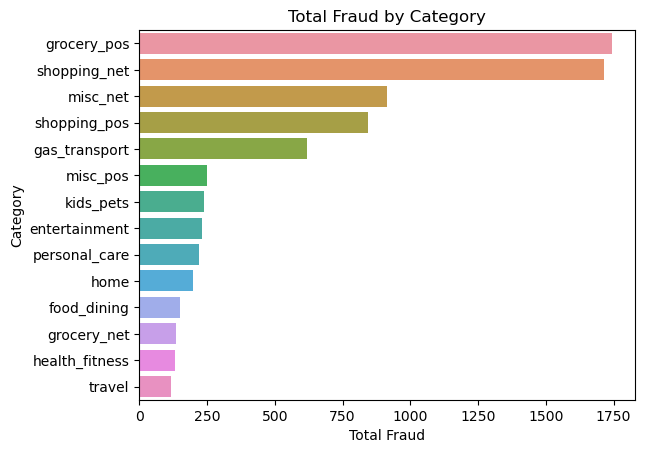

In [32]:
df3=df1.groupby('category')['is_fraud'].sum().reset_index().sort_values(by='is_fraud',ascending=False)
sns.barplot(data=df3,y='category',x='is_fraud')
plt.title('Total Fraud by Category')
plt.xlabel('Total Fraud')
plt.ylabel('Category')
plt.show()

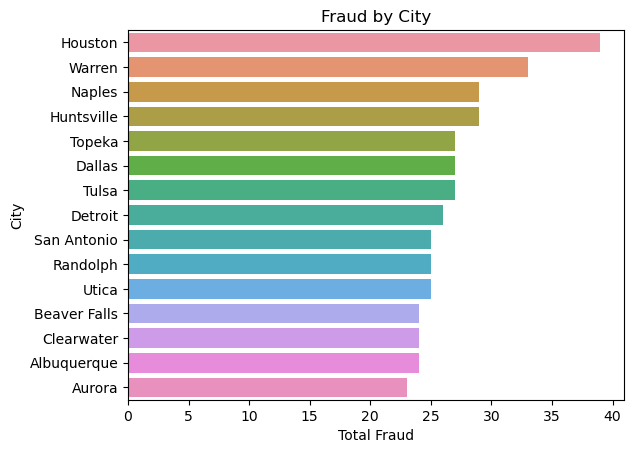

In [33]:
df4=df1.groupby('city')['is_fraud'].sum().reset_index().sort_values('is_fraud',ascending=False)
sns.barplot(data=df4[:15],x='is_fraud',y='city')
plt.title('Fraud by City')
plt.xlabel('Total Fraud')
plt.ylabel('City')
plt.show()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64
Index(['index', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'merch_zipcode', 'trans_date', 'trans_time', 'birth_year',
       'year', 'month', 'hour', 'age'],
      dtype='object')
0


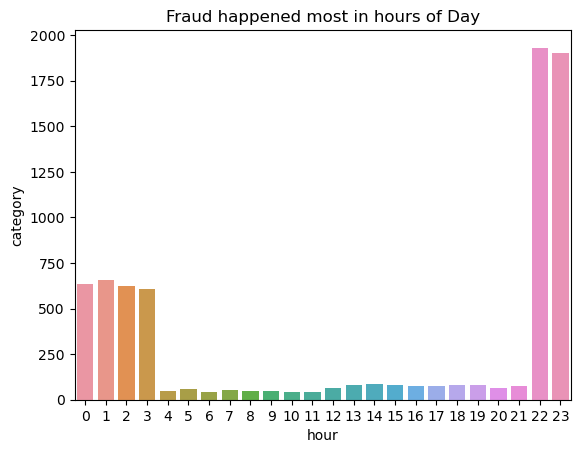

In [34]:
print(df1['is_fraud'].value_counts())
print(df1.columns)
print(df1.duplicated().sum())
df5=df1.loc[df1['is_fraud']==1].groupby('hour')['category'].count().reset_index().sort_values('category',ascending=False)
sns.barplot(x='hour',y='category',data=df5)
plt.title('Fraud happened most in hours of Day')
plt.show()

c:\Users\zhida\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


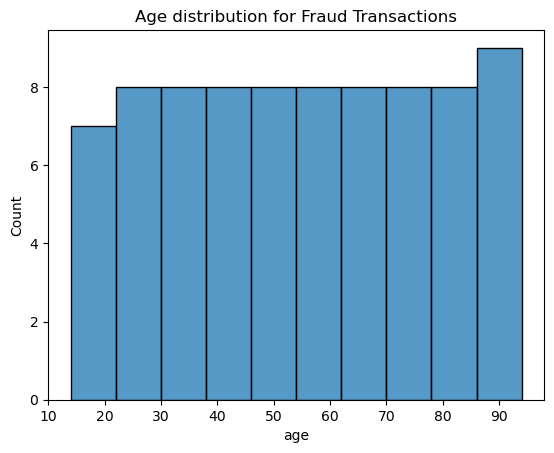

In [35]:
df6=df1.loc[df1['is_fraud']==1].groupby('age')['city'].count()
sns.histplot(data=df6,x='age',bins=10)
plt.title('Age distribution for Fraud Transactions')
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1['amt']=scaler.fit_transform(df1['amt'].values.reshape(-1,1))
df1['city_pop']=scaler.fit_transform(df1['city_pop'].values.reshape(-1,1))

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report,roc_auc_score,f1_score
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
fraud_records=len(df1[df1['is_fraud']==1])
fraud_indices=np.array(df1[df1['is_fraud']==1].index)
normal_indices=df1[df1['is_fraud']==0].index
random_normal_indices=np.random.choice(normal_indices, fraud_records,replace=False)
random_normal_indices=np.array(random_normal_indices)
under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])
under_sample_data=df1.iloc[under_sample_indices,:]

X_undersample=under_sample_data.drop('is_fraud',axis=1)
y_undersample=under_sample_data['is_fraud']

features=['merchant','category','amt','gender','city','city_pop','job','age','hour']
X=df1[features]
y=df1['is_fraud']
X[['merchant','category','gender','city','job']]=X[['merchant','category','gender','city','job']].apply(LabelEncoder().fit_transform)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape,y_test.shape)

X_undersample=X_undersample[features]
X_undersample[['merchant','category','gender','city','job']]=X_undersample[['merchant','category','gender','city','job']].apply(LabelEncoder().fit_transform)
X_train_under, X_test_under, y_train_under, y_test_under=train_test_split(X_undersample,y_undersample,test_size=0.3,random_state=42)
print(X_train_under.shape,y_test_under.shape)

C:\Users\zhida\AppData\Local\Temp\ipykernel_10360\821876795.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['merchant','category','gender','city','job']]=X[['merchant','category','gender','city','job']].apply(LabelEncoder().fit_transform)


(907672, 9) (389003,)
(10508, 9) (4504,)


In [39]:
lg=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
lg.fit(X_train_under, y_train_under)
print('lg_recall_score:',recall_score(y_test_under,lg.predict(X_test_under)))
print('precision:',precision_score(y_test_under,lg.predict(X_test_under)))
print(confusion_matrix(y_test_under, lg.predict(X_test_under)))
print(classification_report(y_test_under,lg.predict(X_test_under)))

lg_recall_score: 0.7531362007168458
precision: 0.9297566371681416
[[2145  127]
 [ 551 1681]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      2272
           1       0.93      0.75      0.83      2232

    accuracy                           0.85      4504
   macro avg       0.86      0.85      0.85      4504
weighted avg       0.86      0.85      0.85      4504



c:\Users\zhida\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
rf.fit(X_train_under, y_train_under)
y_predprob=rf.predict_proba(X_test_under)[:,1]

print('rf_recall_score:',recall_score(y_test_under,rf.predict(X_test_under)))
print('precision:',precision_score(y_test_under,rf.predict(X_test_under)))
print('AUC Score:',roc_auc_score(y_test_under,y_predprob))
print(confusion_matrix(y_test_under, rf.predict(X_test_under)))
print(classification_report(y_test_under,rf.predict(X_test_under)))

rf_recall_score: 0.9655017921146953
precision: 0.9746720940750792
AUC Score: 0.9955325309833913
[[2216   56]
 [  77 2155]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2272
           1       0.97      0.97      0.97      2232

    accuracy                           0.97      4504
   macro avg       0.97      0.97      0.97      4504
weighted avg       0.97      0.97      0.97      4504



In [40]:
dt.fit(X_train_under, y_train_under)
print('dt_recall_score:',recall_score(y_test_under,dt.predict(X_test_under)))
print('precision:',precision_score(y_test_under,dt.predict(X_test_under)))
print(confusion_matrix(y_test_under, dt.predict(X_test_under)))
print(classification_report(y_test_under,dt.predict(X_test_under)))


dt_recall_score: 0.9623655913978495
precision: 0.960644007155635
[[2184   88]
 [  84 2148]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2272
           1       0.96      0.96      0.96      2232

    accuracy                           0.96      4504
   macro avg       0.96      0.96      0.96      4504
weighted avg       0.96      0.96      0.96      4504



In [41]:
rf.fit(X_train_under, y_train_under)
y_predprob_raw=rf.predict_proba(X_test)[:,1]
print('rf_recall_score:',recall_score(y_test,rf.predict(X_test)))
print('precision:',precision_score(y_test,rf.predict(X_test)))
print('AUC Score:',roc_auc_score(y_test,y_predprob_raw))
print(confusion_matrix(y_test, rf.predict(X_test)))
print(classification_report(y_test,rf.predict(X_test)))

rf_recall_score: 0.9912472647702407
precision: 0.1924547540147846
AUC Score: 0.9981645726886429
[[377214   9504]
 [    20   2265]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    386718
           1       0.19      0.99      0.32      2285

    accuracy                           0.98    389003
   macro avg       0.60      0.98      0.65    389003
weighted avg       1.00      0.98      0.98    389003



RandomForestClassifier trained with undersampled balanced data performance the best , but test with original full data , the precision score are pretty low, means when the model trained with balanced data test with original imbalanced data, there were too many good transactions wrongly predicted to be fraud. 

In [44]:
rf.fit(X_train, y_train)
y_predprob1=rf.predict_proba(X_test)[:,1]
print('rf_recall_score:',recall_score(y_test,rf.predict(X_test)))
print('precision:',precision_score(y_test,rf.predict(X_test)))
print('AUC Score:',roc_auc_score(y_test,y_predprob1))
print(confusion_matrix(y_test, rf.predict(X_test)))
print(classification_report(y_test,rf.predict(X_test)))

rf_recall_score: 0.8013129102844639
precision: 0.9586387434554974
AUC Score: 0.9875894288673794
[[386639     79]
 [   454   1831]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.96      0.80      0.87      2285

    accuracy                           1.00    389003
   macro avg       0.98      0.90      0.94    389003
weighted avg       1.00      1.00      1.00    389003



use RandomForestClassifier directly with original imblanced data even better than tuned balanced undersampled data. but not good enough. the model recall_score were not good enough, meaning there were sitll some fraud transactions were missed by model prediction.

In [45]:
#get rid of some useless columns not involving for fraud. 
features=['merchant','category','amt','gender','city','city_pop','job','age','hour','is_fraud']
df2=df1[features]

sample_size=[]
precision=[]
recall=[]
f1=[]

for size in [14400,77000,144000,288000,770000,844000]: #is_fraud==1 count 7506, take 7700 whole number for base steps. 
    sample_size.append(size)
    resampled_normal=df2[df2['is_fraud']==0].sample(n=size,random_state=42)
    resampled_fraud=df2[df2['is_fraud']==1]
    resampled_mix=pd.concat([resampled_normal,resampled_fraud])
    X_resample=resampled_mix.drop('is_fraud',axis=1)
    X_resample[['merchant','category','gender','city','job']]=X_resample[['merchant','category','gender','city','job']].apply(LabelEncoder().fit_transform)
    y_resample=resampled_mix['is_fraud']
    X_train_re,X_test_re,y_train_re,y_test_re=train_test_split(X_resample,y_resample,test_size=0.2,random_state=42)
    rf1=RandomForestClassifier()
    rf1.fit(X_train_re,y_train_re)
    y_pred=rf1.predict(X_test)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    f1.append(f1_score(y_test,y_pred))
precision_recall=pd.concat([pd.DataFrame(sample_size),pd.DataFrame(precision),pd.DataFrame(recall),pd.DataFrame(f1)],axis=1)
precision_recall.columns=['sample_size','precision','recall','f1']
print(precision_recall)

   sample_size  precision    recall        f1
0        14400   0.274114  0.991247  0.429465
1        77000   0.643429  0.985558  0.778565
2       144000   0.781404  0.974617  0.867381
3       288000   0.884878  0.965427  0.923399
4       770000   0.974325  0.963239  0.968750
5       844000   0.976899  0.962363  0.969577


In [48]:
resampled_normal=df2[df2['is_fraud']==0].sample(n=770000,random_state=0)
resampled_fraud=df2[df2['is_fraud']==1]
resampled_mix=pd.concat([resampled_normal,resampled_fraud])
X_resample=resampled_mix.drop('is_fraud',axis=1)
X_resample[['merchant','category','gender','city','job']]=X_resample[['merchant','category','gender','city','job']].apply(LabelEncoder().fit_transform)
y_resample=resampled_mix['is_fraud']
X_train_re,X_test_re,y_train_re,y_test_re=train_test_split(X_resample,y_resample,test_size=0.2,random_state=42)
rf1=RandomForestClassifier()
rf1.fit(X_train_re,y_train_re)
y_pred=rf1.predict(X_test)
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print('f1:',f1_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

precision: 0.9696569920844327
recall: 0.9649890590809628
f1: 0.9673173941653871
[[386649     69]
 [    80   2205]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.97      0.96      0.97      2285

    accuracy                           1.00    389003
   macro avg       0.98      0.98      0.98    389003
weighted avg       1.00      1.00      1.00    389003



recheck with the train sample size 770000. Or, if we try to create a new feature according to rush hours during the day the fraud happened the most, and the fraud amount etc, it may be helpful for improving model performance.

In [ ]:
#from sklearn.model_selection import GridSearchCV 
#param_grid={'n_estimators':[80,100,120],'max_features':['log2','sqrt',10],'min_samples_leaf':[1,2,4],'min_samples_split':[2,3]}
#grid=GridSearchCV(rf1,param_grid=param_grid,n_jobs=-1,cv=3,scoring='f1')
#grid.fit(X_train_re,y_train_re)
#print(grid.best_params_,grid.best_score_) 

tried to get better parameter by GridSearchCV, but it take too long to run.

In [49]:
print(rf1.get_params())
importance=pd.DataFrame(list(zip(X_resample.columns,rf1.feature_importances_)))
importance.columns=['feature','importance']
importance=importance.sort_values('importance',ascending=False)
print(importance)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
    feature  importance
2       amt    0.499536
1  category    0.170104
8      hour    0.119685
7       age    0.064972
5  city_pop    0.040499
0  merchant    0.035935
4      city    0.028324
6       job    0.028152
3    gender    0.012793
